### data1.txt is from Chapter 2 of Ng's Machine learning class ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print("Package Loaded")

Package Loaded


In [2]:
xy = np.loadtxt("data1.txt", delimiter=',', unpack=True, dtype='float64')
train_X = xy[0:-1]
train_Y = xy[-1]

n_samples = train_X[0].size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)
print ("n_samples' is", n_samples)


Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (2, 100)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (100,))
("n_samples' is", 100)


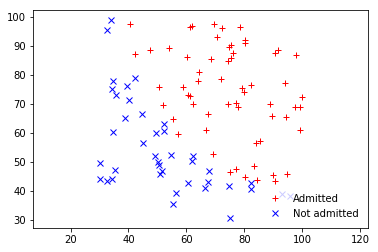

In [3]:
pos = train_Y == 1
neg = train_Y == 0

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.axis('equal')
plt.legend(loc='lower right')

### Cost Function(minimize negative log-likelihood) ###
$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]
$$

### Gradient ###
$$
\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{n}\sum^n_{i=1}(h_\theta (x_i) - y_i)x_{ij}
$$

In [4]:
temp_X = np.insert(train_X, 0, 1, axis=0)
temp_Y = train_Y
W = np.random.random((1, 3))
print W.shape, temp_X.shape


def h(X, w):
    return np.dot(w, X)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def hypothesis(X, w):
    return sigmoid(h(X, w))

def costF(X, Y, w):
    #return np.sum(-Y*np.log(hypothesis(X, w)) - (1-Y)*(np.log(1-hypothesis(X, w)))) / n_samples
    return 
    
def gradientDescent(X, Y, w, alpha, num_iters):
    for i in xrange(num_iters):
        for j in xrange(w.size):
            w[0,j] -= np.sum(np.multiply(hypothesis(temp_X, W) - temp_Y, temp_X[j,:])) * alpha / n_samples
        if i % 10000 == 0:
            print i, w, costF(X, Y, w)
    return w

finalW = gradientDescent(temp_X, temp_Y, W, 0.005, 200001)

(1, 3) (3, 100)
0 [[ 0.79215447  0.78570194  0.66002099]] nan
10000 [[-3.19152468 -0.04658582  0.07501203]] 1.14216024184
20000 [[-6.29377483 -0.05143074  0.14115753]] 1.02761586789
30000 [[-8.67384573  0.17113803 -0.03723486]] 0.811753356595
40000 [[-10.48559744   0.1793138    0.0281417 ]] 0.654117896871
50000 [[-11.83095426   0.06710512   0.10094124]] 0.447897237358
60000 [[-12.82913692   0.04399683   0.16571232]] 0.452218400481
70000 [[-13.59006773   0.13764202   0.10934379]] 0.355386713834
80000 [[-14.18188253   0.16256764   0.07092743]] 0.318926011707
90000 [[-14.64832408   0.12227346   0.13142319]] 0.27193392468
100000 [[-15.01887777   0.11293797   0.12399869]] 0.242862724634
110000 [[-15.31559624   0.12763485   0.12183191]] 0.225085790173
120000 [[-15.58224893   0.12975079   0.12398731]] 0.223663776728
130000 [[-15.83652729   0.13177642   0.12603852]] 0.222370696301
140000 [[-16.07942113   0.13371173   0.12799853]] 0.221190820412
150000 [[-16.3118028    0.13556359   0.12987425]]

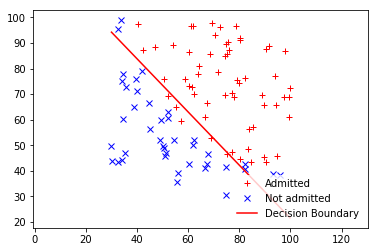

In [5]:
x = np.array([np.min(temp_X[1,:]), np.max(temp_X[1,:])])
y = (-1./W[0,2])*(W[0,0] + W[0,1]*x)

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.plot(x, y, 'r-', label='Decision Boundary')
plt.axis('equal')
plt.legend(loc='lower right')